In [1]:
# Stage 4: Model Evaluation and Visualization
# This stage assumes Stage 3 has been run, and the best model and test data are saved.

import pandas as pd
import numpy as np
import joblib  # For loading the saved model
import json  # For loading model summary
import os

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    precision_recall_curve
)

import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for plots
plt.style.use('seaborn-v0_8-whitegrid')  # Using a seaborn style
sns.set_palette("viridis")  # Setting a color palette

In [2]:
print("--- Stage 4: Best Model Evaluation and Visualization ---")

# --- 4.0 Load Best Model and Test Data ---
print("\n--- 4.0 Load Best Model and Test Data ---")

MODELS_DIR = "../models/"
DATA_DIR = "../data/"
BEST_MODEL_FILENAME = "best_overall_model.joblib"
BEST_MODEL_SUMMARY_FILENAME = "best_model_summary.json"
X_TEST_FILENAME = "X_test_data.csv"
Y_TEST_FILENAME = "y_test_data.csv"

# Load the best model
try:
    best_model_path = os.path.join(MODELS_DIR, BEST_MODEL_FILENAME)
    best_model = joblib.load(best_model_path)
    print(f"Successfully loaded best model from: {best_model_path}")
except FileNotFoundError:
    print(f"Error: Best model file '{best_model_path}' not found.")
    print("Please ensure Stage 3 was run and the model was saved correctly.")
    exit()  # Or handle error appropriately

--- Stage 4: Best Model Evaluation and Visualization ---

--- 4.0 Load Best Model and Test Data ---
Successfully loaded best model from: ../models/best_overall_model.joblib


In [3]:
# Load best model summary (optional, but good for reference)
try:
    summary_path = os.path.join(MODELS_DIR, BEST_MODEL_SUMMARY_FILENAME)
    with open(summary_path, 'r') as f:
        best_model_info = json.load(f)
    print(f"Successfully loaded best model summary from: {summary_path}")
    print(f"Best Model Type: {best_model_info.get('best_model_name', 'N/A')}")
    print(f"Best Model Parameters: {best_model_info.get('parameters', 'N/A')}")
except FileNotFoundError:
    print(f"Warning: Best model summary file '{summary_path}' not found.")
    best_model_info = {}  # Initialize an empty dict if not found

Successfully loaded best model summary from: ../models/best_model_summary.json
Best Model Type: LightGBM_tuned
Best Model Parameters: {'boosting_type': 'gbdt', 'class_weight': 'balanced', 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.01, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'num_leaves': 20, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [4]:
# Load the test data
try:
    X_test_path = os.path.join(DATA_DIR, X_TEST_FILENAME)
    y_test_path = os.path.join(DATA_DIR, Y_TEST_FILENAME)
    X_test = pd.read_csv(X_test_path)
    y_test = pd.read_csv(y_test_path).squeeze()  # .squeeze() to convert DataFrame column to Series
    print(f"Successfully loaded test data: X_test {X_test.shape}, y_test {y_test.shape}")
except FileNotFoundError:
    print(f"Error: Test data files ('{X_TEST_FILENAME}' or '{Y_TEST_FILENAME}') not found in '{DATA_DIR}'.")
    print("Please ensure Stage 3 was run and the test data was saved correctly.")
    exit()  # Or handle error appropriately

Successfully loaded test data: X_test (9952, 19), y_test (9952,)


In [5]:
# Ensure X_test columns match the training data columns if model is sensitive to feature names/order
# (e.g., LightGBM, RandomForest).
# This is usually handled if X_test was saved directly from the split.
# If you have feature names from training, you can reorder/select columns:
# if 'training_features' in best_model_info: # Assuming you saved this
#     X_test = X_test[best_model_info['training_features']]

# --- 4.1 Make Predictions on Test Set ---
print("\n--- 4.1 Make Predictions on Test Set ---")
y_pred_test = best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

print("Predictions on test set completed.")


--- 4.1 Make Predictions on Test Set ---
Predictions on test set completed.


In [6]:
# --- 4.2 Evaluate Model on Test Set ---
print("\n--- 4.2 Evaluate Model on Test Set ---")

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, zero_division=0)
recall_test = recall_score(y_test, y_pred_test, zero_division=0)
f1_test = f1_score(y_test, y_pred_test, zero_division=0)
roc_auc_test = roc_auc_score(y_test, y_proba_test)

print(f"Test Set Evaluation for: {best_model_info.get('best_model_name', 'Best Model')}")
print(f"  Accuracy:  {accuracy_test:.4f}")
print(f"  Precision: {precision_test:.4f}")
print(f"  Recall:    {recall_test:.4f}")
print(f"  F1 Score:  {f1_test:.4f}")
print(f"  ROC AUC:   {roc_auc_test:.4f}")

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test, zero_division=0))

# Store test metrics (optional, can be added to the summary or saved separately)
test_metrics = {
    'accuracy': accuracy_test,
    'precision': precision_test,
    'recall': recall_test,
    'f1_score': f1_test,
    'roc_auc': roc_auc_test,
    'classification_report': classification_report(y_test, y_pred_test, zero_division=0, output_dict=True)
}
# You could update and re-save the best_model_summary.json with these test metrics
# best_model_info['test_metrics'] = test_metrics
# with open(summary_path, 'w') as f:
#     json.dump(best_model_info, f, indent=4, default=str) # Use default=str for numpy types


--- 4.2 Evaluate Model on Test Set ---
Test Set Evaluation for: LightGBM_tuned
  Accuracy:  0.6353
  Precision: 0.4775
  Recall:    0.9979
  F1 Score:  0.6459
  ROC AUC:   0.7457

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.45      0.62      6635
           1       0.48      1.00      0.65      3317

    accuracy                           0.64      9952
   macro avg       0.74      0.73      0.64      9952
weighted avg       0.82      0.64      0.63      9952




--- 4.3 Visualization ---
Plots will be saved to: ../plots


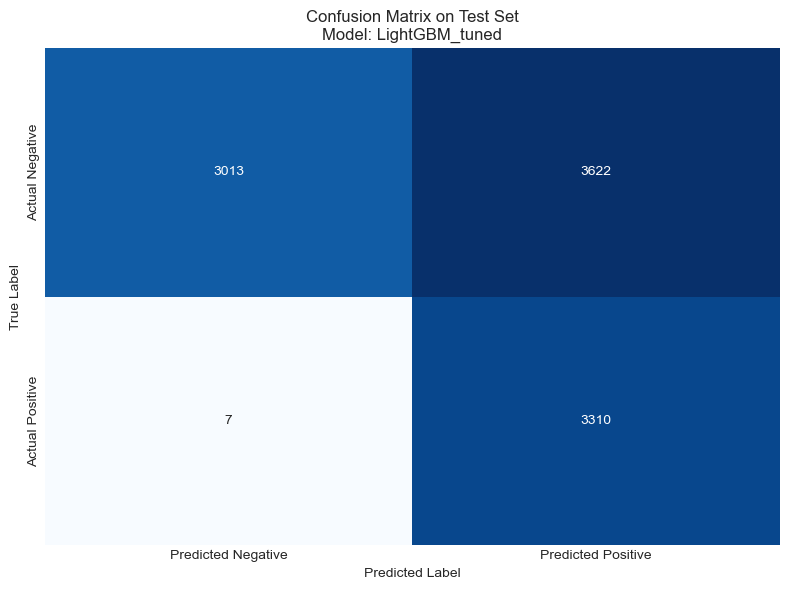

Confusion Matrix plotted and saved.


In [7]:
# --- 4.3 Visualization ---
print("\n--- 4.3 Visualization ---")

# Create a directory for saving plots if it doesn't exist
PLOTS_DIR = "../plots"
if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)
print(f"Plots will be saved to: {PLOTS_DIR}")

# 4.3.1 Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix on Test Set\nModel: {best_model_info.get("best_model_name", "Best Model")}')
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, "confusion_matrix_test.png"))
plt.show()
print("Confusion Matrix plotted and saved.")

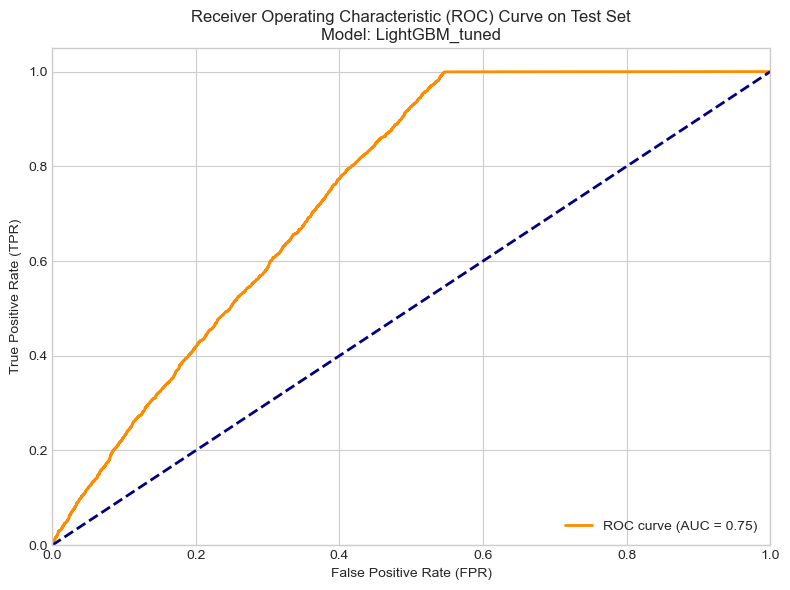

ROC Curve plotted and saved.


In [8]:
# 4.3.2 ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(
    f'Receiver Operating Characteristic (ROC) Curve on Test Set\nModel: {best_model_info.get("best_model_name", "Best Model")}')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, "roc_curve_test.png"))
plt.show()
print("ROC Curve plotted and saved.")

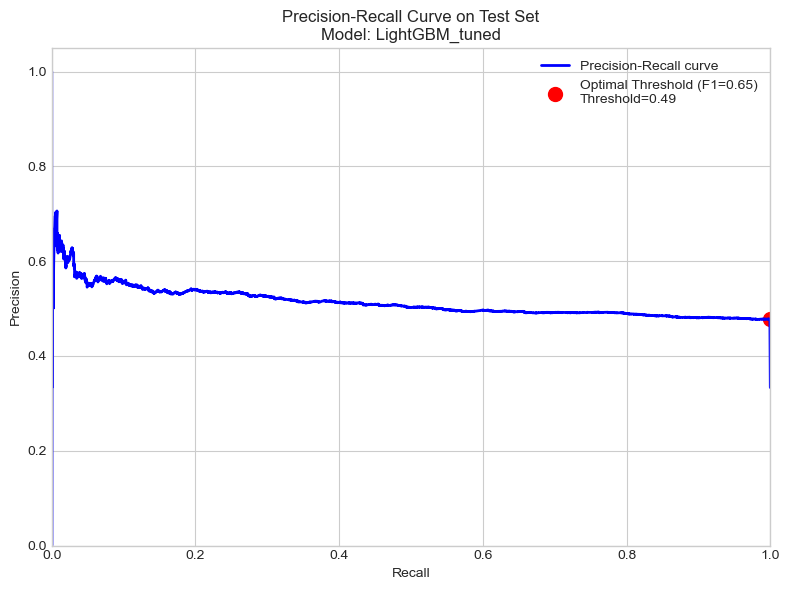

Precision-Recall Curve plotted and saved. Optimal threshold (max F1) ~0.49


In [9]:
# 4.3.3 Precision-Recall Curve
precision_vals, recall_vals, thresholds_pr = precision_recall_curve(y_test, y_proba_test)
# Calculate F1 score for each threshold to find the optimal one based on F1
f1_scores_pr = (2 * precision_vals * recall_vals) / (
            precision_vals + recall_vals + 1e-9)  # 1e-9 to avoid division by zero
# Find threshold that maximizes F1
optimal_idx_pr = np.argmax(f1_scores_pr[:-1])  # Exclude last element as it's (0,1) or (1,0)
optimal_threshold_pr = thresholds_pr[optimal_idx_pr]
optimal_f1_pr = f1_scores_pr[optimal_idx_pr]

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='blue', lw=2, label='Precision-Recall curve')
plt.scatter(recall_vals[optimal_idx_pr], precision_vals[optimal_idx_pr], marker='o', color='red', s=100,
            label=f'Optimal Threshold (F1={optimal_f1_pr:.2f})\nThreshold={optimal_threshold_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve on Test Set\nModel: {best_model_info.get("best_model_name", "Best Model")}')
plt.legend(loc="best")
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, "precision_recall_curve_test.png"))
plt.show()
print(f"Precision-Recall Curve plotted and saved. Optimal threshold (max F1) ~{optimal_threshold_pr:.2f}")

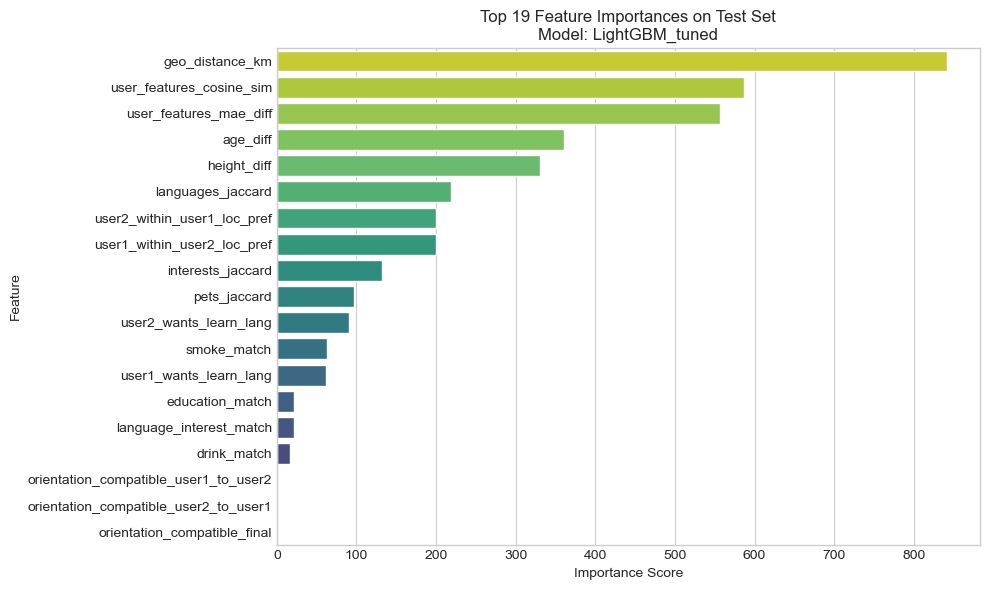

Feature Importance plot generated and saved.

--- Stage 4 Completed ---


In [11]:
# 4.3.4 Feature Importance (if applicable for the model type)
model_type_name = best_model_info.get('best_model_name', '')
if hasattr(best_model, 'feature_importances_') and (X_test.shape[1] > 0):  # Check for attribute and if features exist
    importances = best_model.feature_importances_
    feature_names = X_test.columns

    # Create a DataFrame for easier sorting and plotting
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    # Plot top N features
    top_n = min(20, len(feature_importance_df))  # Plot top 20 or fewer if not enough features

    plt.figure(figsize=(10, max(6, top_n * 0.3)))  # Adjust height based on number of features
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(top_n),
            palette="viridis_r", hue='feature', legend=False)
    plt.title(
        f'Top {top_n} Feature Importances on Test Set\nModel: {best_model_info.get("best_model_name", "Best Model")}')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS_DIR, "feature_importance_test.png"))
    plt.show()
    print("Feature Importance plot generated and saved.")

elif hasattr(best_model, 'coef_') and 'Logistic Regression' in model_type_name and (X_test.shape[1] > 0):
    # For Logistic Regression, coefficients can be interpreted as importances
    coefficients = best_model.coef_[0]  # Coef_ is 2D array for binary classification with shape (1, n_features)
    feature_names = X_test.columns

    feature_importance_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
    # Use absolute value for sorting by magnitude, but plot actual coefficients
    feature_importance_df['abs_coefficient'] = np.abs(coefficients)
    feature_importance_df = feature_importance_df.sort_values(by='abs_coefficient', ascending=False)

    top_n = min(20, len(feature_importance_df))

    plt.figure(figsize=(10, max(6, top_n * 0.3)))
    sns.barplot(x='coefficient', y='feature', data=feature_importance_df.head(top_n), palette="vlag",
                orient='h', hue='feature')  # 'vlag' is good for pos/neg values
    plt.title(
        f'Top {top_n} Feature Coefficients (Importances)\nModel: {best_model_info.get("best_model_name", "Best Model")}')
    plt.xlabel('Coefficient Value (Log-Odds)')
    plt.ylabel('Feature')
    plt.axvline(0, color='grey', lw=0.8)  # Add a line at 0 for reference
    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS_DIR, "feature_coefficients_test.png"))
    plt.show()
    print("Feature Coefficients plot generated and saved.")
else:
    print("Feature importance plot is not applicable for this model type or no features in X_test.")

print("\n--- Stage 4 Completed ---")